# Social Computing Project

## Analyisis of voting patterns of countries in the Security Council considering their resolutions and socio-economic data.

In [ ]:
#file paths used for this project
import os
for dirname, _, filenames in os.walk('/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/un-analysis/UN DATA.csv
/kaggle/input/un-analysis/soci_econ_country_profiles.csv


## Dataset source 1: Scraping UN SC resolutions from 2000 to 2020

### Scraping resolutions from UN's Digital Library

In [2]:
import requests
from bs4 import BeautifulSoup
import os

# Base URL structure for Security Council resolutions by year
BASE_URL_TEMPLATE = "https://main.un.org/securitycouncil/en/content/resolutions-adopted-security-council-{}"

# Directory to save the downloaded PDFs
DOWNLOAD_DIR = "UN_Security_Council_Resolutions"

def create_download_dir():
    """Create the download directory if it doesn't exist."""
    if not os.path.exists(DOWNLOAD_DIR):
        os.makedirs(DOWNLOAD_DIR)

def get_english_pdf_link(resolution_url):
    """Visit the resolution page and find the English PDF link."""
    try:
        response = requests.get(resolution_url, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            # Find the <a> tag with "English" and lang="en"
            english_link = soup.find("a", {"lang": "en", "class": "btn btn-primary link"}, string="English")
            if english_link:
                return english_link["href"]
        print(f"Failed to retrieve English link from {resolution_url}")
    except requests.RequestException as e:
        print(f"Error fetching {resolution_url}: {e}")
    return None

def download_pdf(pdf_url, year, resolution_name):
    """Download a PDF file."""
    try:
        response = requests.get(pdf_url, stream=True, timeout=10)
        if response.status_code == 200:
            file_name = f"{year}_{resolution_name.replace('/', '_')}.pdf"
            file_path = os.path.join(DOWNLOAD_DIR, file_name)
            with open(file_path, "wb") as pdf_file:
                for chunk in response.iter_content(chunk_size=1024):
                    pdf_file.write(chunk)
            print(f"Downloaded: {file_path}")
        else:
            print(f"Failed to download: {pdf_url} (Status Code: {response.status_code})")
    except requests.RequestException as e:
        print(f"Error downloading {pdf_url}: {e}")

def scrape_resolutions_for_year(year):
    """Scrape all resolutions for a specific year and download the English PDFs."""
    url = BASE_URL_TEMPLATE.format(year)
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            print(f"\nScraping resolutions for the year {year} from {url}...\n")
            soup = BeautifulSoup(response.content, "html.parser")
            resolution_links = soup.find_all("a", href=True)
            for link in resolution_links:
                href = link["href"]
                if "/s/res/" in href.lower():  # Match resolution links
                    resolution_name = href.split("/")[-1]
                    resolution_url = href if href.startswith("http") else f"https://undocs.org{href}"
                    english_pdf_url = get_english_pdf_link(resolution_url)
                    if english_pdf_url:
                        download_pdf(english_pdf_url, year, resolution_name)
        else:
            print(f"Failed to access {url}. Status Code: {response.status_code}")
    except requests.RequestException as e:
        print(f"Error accessing {url}: {e}")


create_download_dir()
for year in range(2000, 2020):  # Loop through the years 2000 to 2020
    scrape_resolutions_for_year(year)


Scraping resolutions for the year 2000 from https://main.un.org/securitycouncil/en/content/resolutions-adopted-security-council-2000...

Downloaded: UN_Security_Council_Resolutions/2000_1334(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1333(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1332(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1331(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1330(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1329(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1328(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1327(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1326(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1325(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1324(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1323(2000).pdf
Downloaded: UN_Security_Council_Resolutions/2000_1322(2000).pdf
Downloaded: UN_Security_Counci

### Testing text extraction from a scraped resolution

In [3]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 21.6 MB/s eta 0:00:00


In [4]:
import pdfplumber

# Path to your PDF file
pdf_path = "/kaggle/working/UN_Security_Council_Resolutions/2001_1367(2001).pdf"

def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF using pdfplumber."""
    try:
        with pdfplumber.open(pdf_path) as pdf:
            text = ""
            for page in pdf.pages:
                text += page.extract_text()
            return text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None

# Extract and display the text
extracted_text = extract_text_from_pdf(pdf_path)
if extracted_text:
    print("Extracted Text:\n")
    print(extracted_text)  # Print the first 1000 characters
else:
    print("No text extracted.")

Extracted Text:

S
United Nations /RES/1367 (2001)
Security Council
Distr.: General
10 September 2001
Resolution 1367 (2001)
Adopted by the Security Council at its 4366th meeting, on
10 September 2001
The Security Council,
Recalling its resolutions 1160 (1998) of 31 March 1998, 1199 (1998) of 23
September 1998, 1203 (1998) of 24 October 1998, and reaffirming, in particular, its
resolutions 1244 (1999) of 10 June 1999 and 1345 (2001) of 21 March 2001,
Noting with satisfaction that the conditions listed in paragraph 16 (a) to (e) of
its resolution 1160 (1998) have been satisfied,
Noting, in that respect, the letter of the Secretary-General dated 6 September
2001 (S/2001/849),
Noting further the difficult security situation along Kosovo’s administrative
boundary and parts of the border of the Federal Republic of Yugoslavia and
emphasizing the continuing authority of the Secretary-General’s Special
Representative as head of the international civil presence and of the Commander of
the inter

### Converting the pdf files into a csv

In [5]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 89.1 MB/s eta 0:00:00


In [ ]:
import fitz  # PyMuPDF
import re
import pandas as pd

# Path to the folder containing PDF files
pdf_folder = "/UN_Security_Council_Resolutions"

def extract_text_with_pymupdf(pdf_path):
    """Extract text from a PDF using PyMuPDF."""
    try:
        with fitz.open(pdf_path) as pdf:
            text = ""
            for page in pdf:
                text += page.get_text()  # Extract text from each page
            return text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None

def extract_resolution_number(text):
    """Extract the resolution number from the text."""
    match = re.search(r"(S/)?RES/\d+ \(\d{4}\)", text)
    return match.group(0) if match else None

def preprocess_resolutions(folder_path):
    """Preprocess all resolutions in the given folder."""
    preprocessed_data = []
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".pdf"):
            file_path = os.path.join(folder_path, file_name)
            print(f"Processing: {file_name}")
            
            # Step 1: Extract text
            resolution_text = extract_text_with_pymupdf(file_path)
            if not resolution_text:
                continue
            
            # Step 2: Extract resolution number
            resolution_number = extract_resolution_number(resolution_text)
            if not resolution_number:
                print(f"Resolution number not found in {file_name}")
                continue
            
            # Store the preprocessed data
            preprocessed_data.append({
                "ResolutionNumber": resolution_number,
                "FullText": resolution_text
            })
    
    return preprocessed_data

# Preprocess the resolutions
preprocessed_resolutions = preprocess_resolutions(pdf_folder)

# Save the preprocessed data to a CSV file, escaping commas and newlines
output_path = "Full_UN_Resolutions.csv"
df = pd.DataFrame(preprocessed_resolutions)

df.head()

# Ensure that FullText is safely escaped for CSV
df.to_csv(output_path, index=False, quoting=1)  # quoting=1 adds quotes around fields with special characters

print(f"Preprocessing complete. Data saved to {output_path}.")

Processing: 2001_1371(2001).pdf
Processing: 2010_1917(2010).pdf
Processing: 2007_1740(2007).pdf
Processing: 2008_1825(2008).pdf
Processing: 2006_1731(2006).pdf
Processing: 2002_1442(2002).pdf
Processing: 2000_1303(2000).pdf
Processing: 2007_1777(2007).pdf
Processing: 2016_2326(2016).pdf
Processing: 2006_1706(2006).pdf
Processing: 2002_1421(2002).pdf
Processing: 2013_2119(2013).pdf
Processing: 2005_1602(2005).pdf
Processing: 2008_1847(2008).pdf
Processing: 2003_1458(2003).pdf
Processing: 2010_1915(2010).pdf
Processing: 2002_1406(2002).pdf
Processing: 2014_2187%20(2014).pdf
Processing: 2007_1757(2007).pdf
Processing: 2013_2099(2013).pdf
Processing: 2001_1343(2001).pdf
Processing: 2008_1856(2008).pdf
Processing: 2015_2216(2015).pdf
Processing: 2017_2376(2017).pdf
Processing: 2005_1651(2005).pdf
Processing: 2018_2437(2018).pdf
Processing: 2019_2456(2019).pdf
Processing: 2016_2318(2016).pdf
Processing: 2006_1724(2006).pdf
Processing: 2006_1673(2006).pdf
Processing: 2004_1564(2004).pdf
Proce

### Fixing the resolution number format

In [ ]:
# Load the CSV file
file_path = 'Full_UN_Resolutions.csv'
df = pd.read_csv(file_path)

# Function to standardize ResolutionNumber
def format_resolution_number(res_num):
    try:
        # Match the pattern with or without "S/" and spaces
        match = re.search(r"(S/)?RES/(\d+)\s*\((\d{4})\)", res_num)
        if match:
            # Extract the resolution number and year, then format it
            return f"S/RES/{match.group(2)}({match.group(3)})"
        else:
            return res_num  # Return as-is if no match (unexpected cases)
    except Exception as e:
        print(f"Error processing: {res_num}, Error: {e}")
        return res_num

# Apply the function to standardize ResolutionNumber column
df['ResolutionNumber'] = df['ResolutionNumber'].apply(format_resolution_number)

# Save the updated DataFrame back to CSV
output_path = 'Full_UN_Resolutions_Formatted.csv'
df.to_csv(output_path, index=False)

df.head()

print(f"Resolution numbers have been formatted and saved to {output_path}.")

Resolution numbers have been formatted and saved to Full_UN_Resolutions_Formatted.csv.


## Dataset source 2: Socio-economic dataset

In [ ]:
# Load the socio-economic dataset
socio_economic_path = "./soci_econ_country_profiles.csv"
socio_econ_df = pd.read_csv(socio_economic_path)

unsc_2000_2020 = [
    "ARGENTINA", "AUSTRALIA", "AUSTRIA", "BANGLADESH", "BELGIUM", "BENIN", "BOSNIA AND HERZEGOVINA",
    "BRAZIL", "BULGARIA", "BURKINA FASO", "CANADA", "CHAD", "CHILE", "CHINA", "COLOMBIA", "CONGO",
    "COSTA RICA", "COTE D'IVOIRE", "CROATIA", "DENMARK", "DOMINICAN REPUBLIC", "EGYPT", "EQUATORIAL GUINEA",
    "ESTONIA", "ETHIOPIA", "FRANCE", "GABON", "GERMANY", "GHANA", "GREECE", "GUATEMALA", "GUINEA", "INDIA",
    "INDONESIA", "IRELAND", "ITALY", "JAMAICA", "JAPAN", "JORDAN", "KAZAKHSTAN", "KUWAIT", "LIBYA",
    "LITHUANIA", "LUXEMBOURG", "MALAYSIA", "MALI", "MAURITIUS", "MEXICO", "MOROCCO", "NAMIBIA",
    "NETHERLANDS", "NEW ZEALAND", "NIGER", "NIGERIA", "NORWAY", "PAKISTAN", "PERU", "PHILIPPINES",
    "POLAND", "PORTUGAL", "QATAR", "ROMANIA", "RUSSIA", "RWANDA", "SENEGAL", "SINGAPORE", "SLOVAKIA",
    "SOUTH AFRICA", "SPAIN", "SWEDEN", "TANZANIA", "TOGO", "TUNISIA", "TURKEY", "UKRAINE", "UNITED KINGDOM",
    "UNITED STATES", "URUGUAY", "VENEZUELA", "VIETNAM"
]


# Filter for UNSC members
filtered_socio_econ_df = socio_econ_df[socio_econ_df["country"].str.upper().isin(unsc_2000_2020)]

# Save filtered dataset
filtered_socio_econ_path = "Filtered_SocioEconomic_Countries.csv"
filtered_socio_econ_df.to_csv(filtered_socio_econ_path, index=False)
print(f"Filtered socio-economic data saved to {filtered_socio_econ_path}.")

Filtered socio-economic data saved to Filtered_SocioEconomic_Countries.csv.


In [9]:
# Display the first few rows of the dataset
print("Filtered Socio-Economic Data Overview:")
print(filtered_socio_econ_df.head())

# Summary statistics
print("\nSummary Statistics:")
print(filtered_socio_econ_df.describe())

Filtered Socio-Economic Data Overview:
   Unnamed: 0                 country          Region  Surface area (km2)  \
0           0               Argentina    SouthAmerica             2780400   
1           1               Australia         Oceania             7692060   
2           2                 Austria   WesternEurope               83871   
4           4                 Belgium   WesternEurope               30528   
5           5  Bosnia and Herzegovina  SouthernEurope               51209   

   Population in thousands (2017)  Population density (per km2, 2017)  \
0                           44271                                16.2   
1                           24451                                 3.2   
2                            8736                               106.0   
4                           11429                               377.5   
5                            3507                                68.8   

   Sex ratio (m per 100 f, 2017)  \
0                      

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


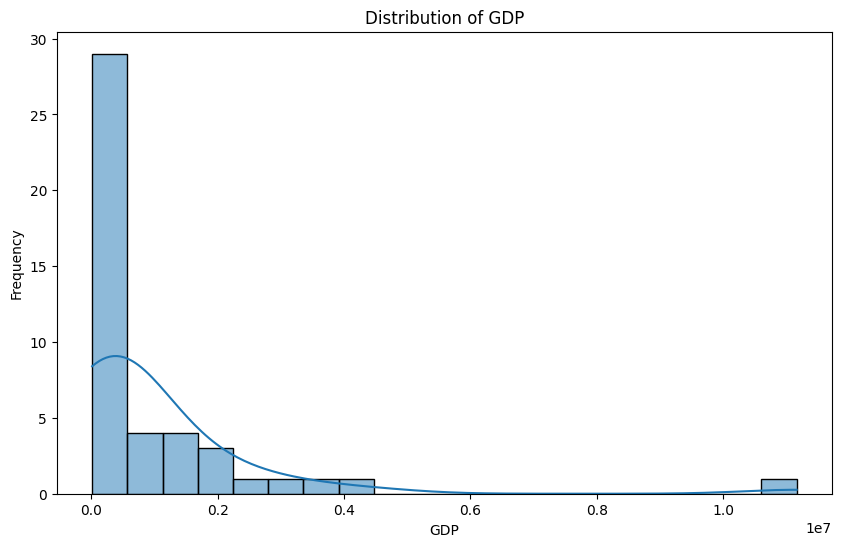

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_socio_econ_df['GDP: Gross domestic product (million current US$)'], bins=20, kde=True)
plt.title("Distribution of GDP")
plt.xlabel("GDP")
plt.ylabel("Frequency")
plt.show()

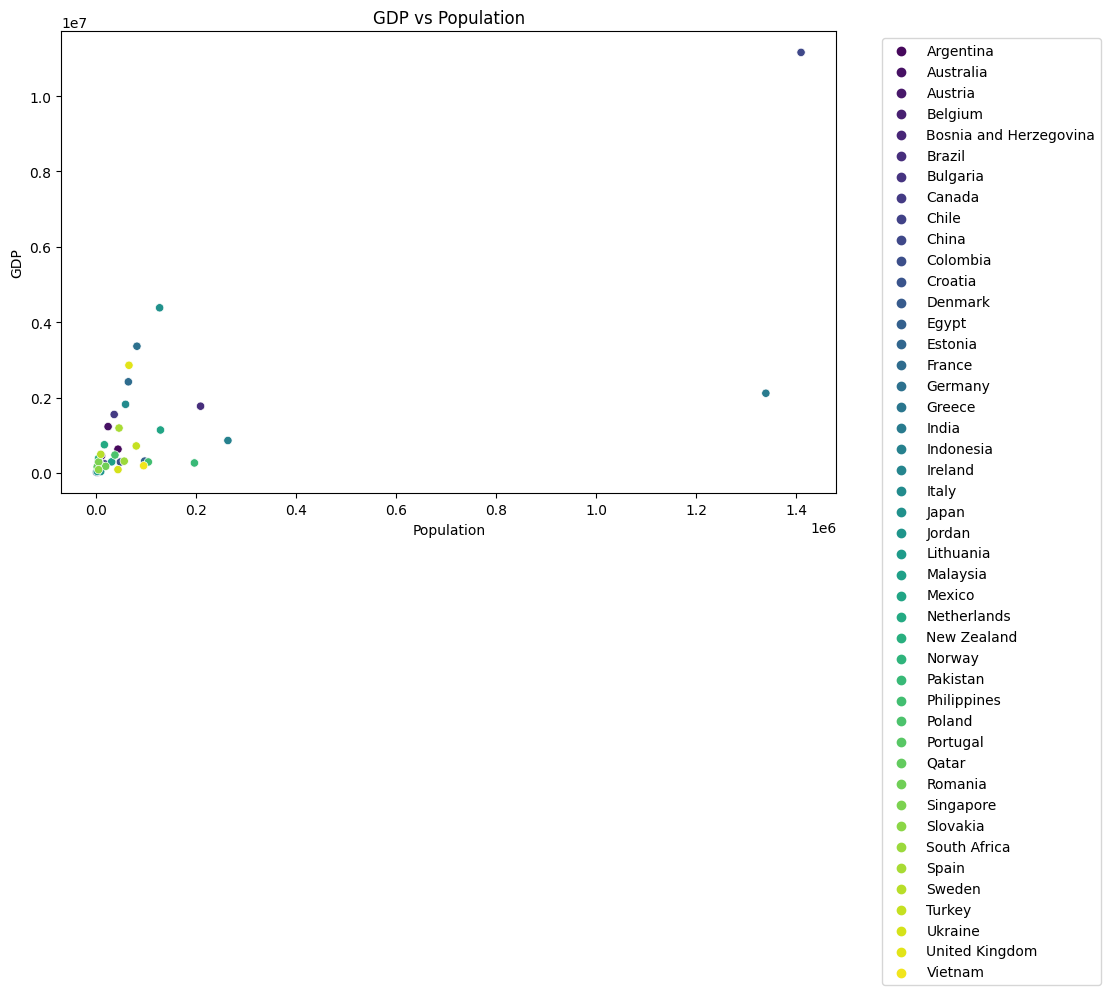

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_socio_econ_df, x='Population in thousands (2017)', y='GDP: Gross domestic product (million current US$)', hue='country', palette='viridis')
plt.title("GDP vs Population")
plt.xlabel("Population")
plt.ylabel("GDP")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

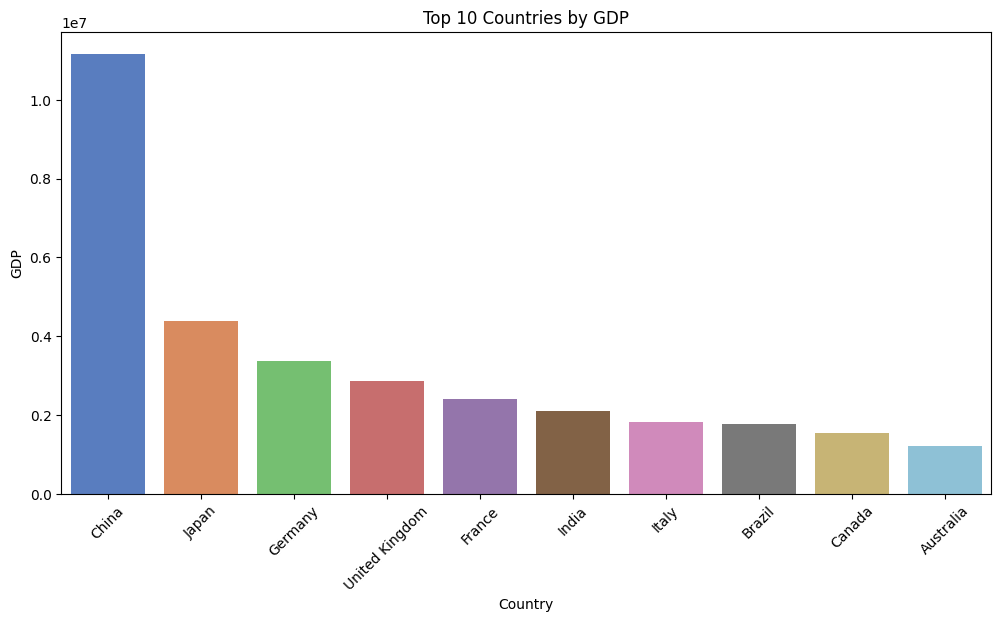

In [13]:
top_countries = filtered_socio_econ_df.sort_values(by='GDP: Gross domestic product (million current US$)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='country', y='GDP: Gross domestic product (million current US$)', palette='muted')
plt.title("Top 10 Countries by GDP")
plt.xlabel("Country")
plt.ylabel("GDP")
plt.xticks(rotation=45)
plt.show()

### Dataset source 3: UN Voting Data

In [ ]:
import pandas as pd

# Load the original UNSC voting dataset
original_unsc_path = "./UN DATA.csv"
original_unsc_df = pd.read_csv(original_unsc_path)

original_unsc_df.head()

/tmp/ipykernel_23/2218527722.py:5: DtypeWarning: Columns (228,229,230,232,235,236,238,239,240,241,242,243,245,246,247,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269) have mixed types. Specify dtype option on import or set low_memory=False.
  original_unsc_df = pd.read_csv(original_unsc_path)


,Council,Date,Title,Resolution,TOTAL VOTES,NO-VOTE COUNT,ABSENT COUNT,NO COUNT,YES COUNT,Link,...,BOLIVIA (PLUNATIONAL STATE OF),SIAM,REPULIC OF MOLDOVA,PHILIPPINE REPUBLIC,SURINAM,BELGIUM,SAINT CHRISTOPHER AND NEVIS,TKAZAKHSTAN,DEMOCRATIC CAMPUCHEA,CONGO (DEMOCRATIC REPUBLIC OF)
0,Security Council,2016-12-13,Security Council resolution 2323 (2016) [on ex...,S/RES/2323(2016),15,0,0,0,15,https://digitallibrary.un.org/record/852025?ln=en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Security Council,2020-06-22,Security Council resolution 2527 (2020) [on ex...,S/RES/2527(2020),15,0,0,0,15,https://digitallibrary.un.org/record/3866679?l...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Security Council,2016-12-14,Security Council resolution 2324 (2016) [on Se...,S/RES/2324(2016),15,0,0,0,15,https://digitallibrary.un.org/record/852028?ln=en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Security Council,2016-12-12,Security Council resolution 2322 (2016) [on in...,S/RES/2322(2016),15,0,0,0,15,https://digitallibrary.un.org/record/852020?ln=en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Security Council,2005-09-23,Security Council resolution 1627 (2005) [on ex...,S/RES/1627(2005),15,0,0,0,15,https://digitallibrary.un.org/record/557118?ln=en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# List of UNSC members (2000–2020)
unsc_2000_2020 = [
    "ARGENTINA", "AUSTRALIA", "AUSTRIA", "AZERBAIJAN", "BANGLADESH",
    "BELGIUM", "BENIN", "BOSNIA AND HERZEGOVINA", "BRAZIL", "BULGARIA",
    "BURKINA FASO", "CAMEROON", "CANADA", "CHAD", "CHILE", "CHINA",
    "COSTA RICA", "COTE D'IVOIRE", "CROATIA", "CUBA", "DENMARK",
    "DOMINICAN REPUBLIC", "EGYPT", "ESTONIA", "FRANCE", "GABON",
    "GERMANY", "GHANA", "GREECE", "GUATEMALA", "HONDURAS", "HUNGARY",
    "INDIA", "INDONESIA", "IRAN", "IRAQ", "IRELAND", "ITALY", "JAMAICA",
    "JAPAN", "JORDAN", "KENYA", "KUWAIT", "LATVIA", "LIBYA", "LITHUANIA",
    "LUXEMBOURG", "MALAYSIA", "MEXICO", "MOROCCO", "NETHERLANDS",
    "NEW ZEALAND", "NIGERIA", "NORWAY", "PAKISTAN", "PANAMA", "PERU",
    "PHILIPPINES", "POLAND", "PORTUGAL", "QATAR", "REPUBLIC OF KOREA",
    "ROMANIA", "RUSSIA", "RWANDA", "SAINT VINCENT AND THE GRENADINES",
    "SAUDI ARABIA", "SENEGAL", "SINGAPORE", "SLOVAKIA", "SLOVENIA",
    "SOUTH AFRICA", "SPAIN", "SUDAN", "SWEDEN", "SYRIA", "THAILAND",
    "TUNISIA", "TURKEY", "UGANDA", "UKRAINE", "UNITED KINGDOM",
    "UNITED STATES", "URUGUAY", "VENEZUELA", "VIETNAM", "ZAMBIA"
]

# Filter for UNSC members
available_countries = [col for col in unsc_2000_2020 if col in original_unsc_df.columns]

# Create a copy of the filtered DataFrame
processed_unsc_df = original_unsc_df[["Resolution", "Date"] + available_countries].copy()

# Encode voting data
vote_mapping = {
    'Y': 1,   # Yes
    'N': -1,  # No
    'X': 0,   # Abstain
    'A': -2,  # Not Present
    None: -3  # Missing/Null values
}

# Apply encoding using .loc
for col in processed_unsc_df.columns[2:]:
    processed_unsc_df.loc[:, col] = processed_unsc_df[col].map(vote_mapping)

# Display the processed DataFrame
print(processed_unsc_df.head())

# Save the encoded dataset
encoded_voting_path = "Encoded_UNSC_Voting_Data.csv"
processed_unsc_df.to_csv(encoded_voting_path, index=False)
print(f"Encoded dataset saved to {encoded_voting_path}.")


         Resolution        Date ARGENTINA AUSTRALIA AUSTRIA AZERBAIJAN  \
0  S/RES/2323(2016)  2016-12-13       NaN       NaN     NaN        NaN   
1  S/RES/2527(2020)  2020-06-22       NaN       NaN     NaN        NaN   
2  S/RES/2324(2016)  2016-12-14       NaN       NaN     NaN        NaN   
3  S/RES/2322(2016)  2016-12-12       NaN       NaN     NaN        NaN   
4  S/RES/1627(2005)  2005-09-23       1.0       NaN     NaN        NaN   

  BANGLADESH BELGIUM BENIN BOSNIA AND HERZEGOVINA  ... THAILAND TUNISIA  \
0        NaN     NaN   NaN                    NaN  ...      NaN     NaN   
1        NaN     1.0   NaN                    NaN  ...      NaN     1.0   
2        NaN     NaN   NaN                    NaN  ...      NaN     NaN   
3        NaN     NaN   NaN                    NaN  ...      NaN     NaN   
4        NaN     NaN   1.0                    NaN  ...      NaN     NaN   

  TURKEY UGANDA UKRAINE UNITED KINGDOM UNITED STATES URUGUAY VENEZUELA ZAMBIA  
0    NaN    NaN     1.0 

In [16]:
processed_unsc_df.head()

,Resolution,Date,ARGENTINA,AUSTRALIA,AUSTRIA,AZERBAIJAN,BANGLADESH,BELGIUM,BENIN,BOSNIA AND HERZEGOVINA,...,THAILAND,TUNISIA,TURKEY,UGANDA,UKRAINE,UNITED KINGDOM,UNITED STATES,URUGUAY,VENEZUELA,ZAMBIA
0,S/RES/2323(2016),2016-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
1,S/RES/2527(2020),2020-06-22,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,S/RES/2324(2016),2016-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
3,S/RES/2322(2016),2016-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
4,S/RES/1627(2005),2005-09-23,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN


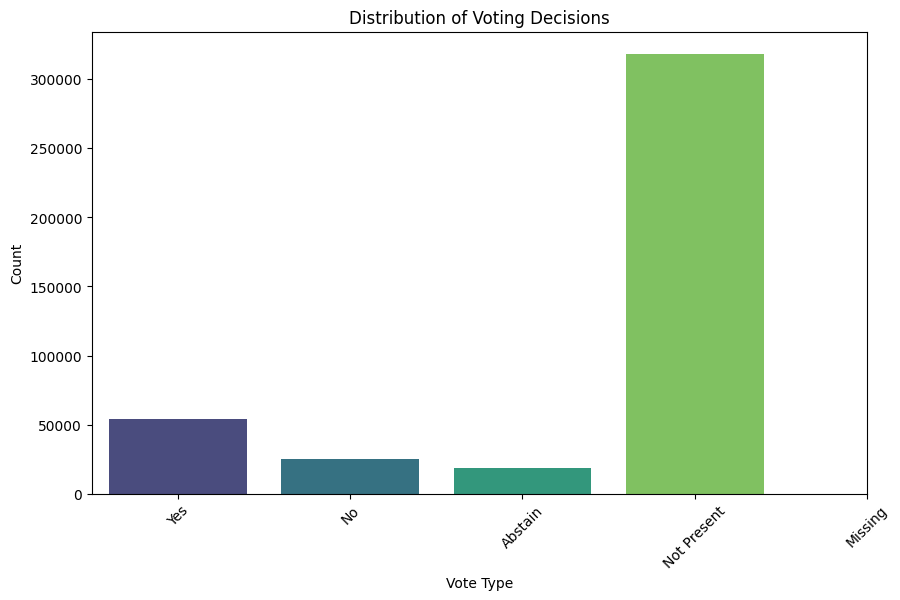

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten all voting data into a single series
voting_flattened = processed_unsc_df.iloc[:, 2:].stack()

# Count occurrences of each vote type
vote_counts = voting_flattened.value_counts()

# Plot the distribution of votes
plt.figure(figsize=(10, 6))
sns.barplot(x=vote_counts.index, y=vote_counts.values, palette="viridis")
plt.title("Distribution of Voting Decisions")
plt.xlabel("Vote Type")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Yes', 'No', 'Abstain', 'Not Present', 'Missing'], rotation=45)
plt.show()

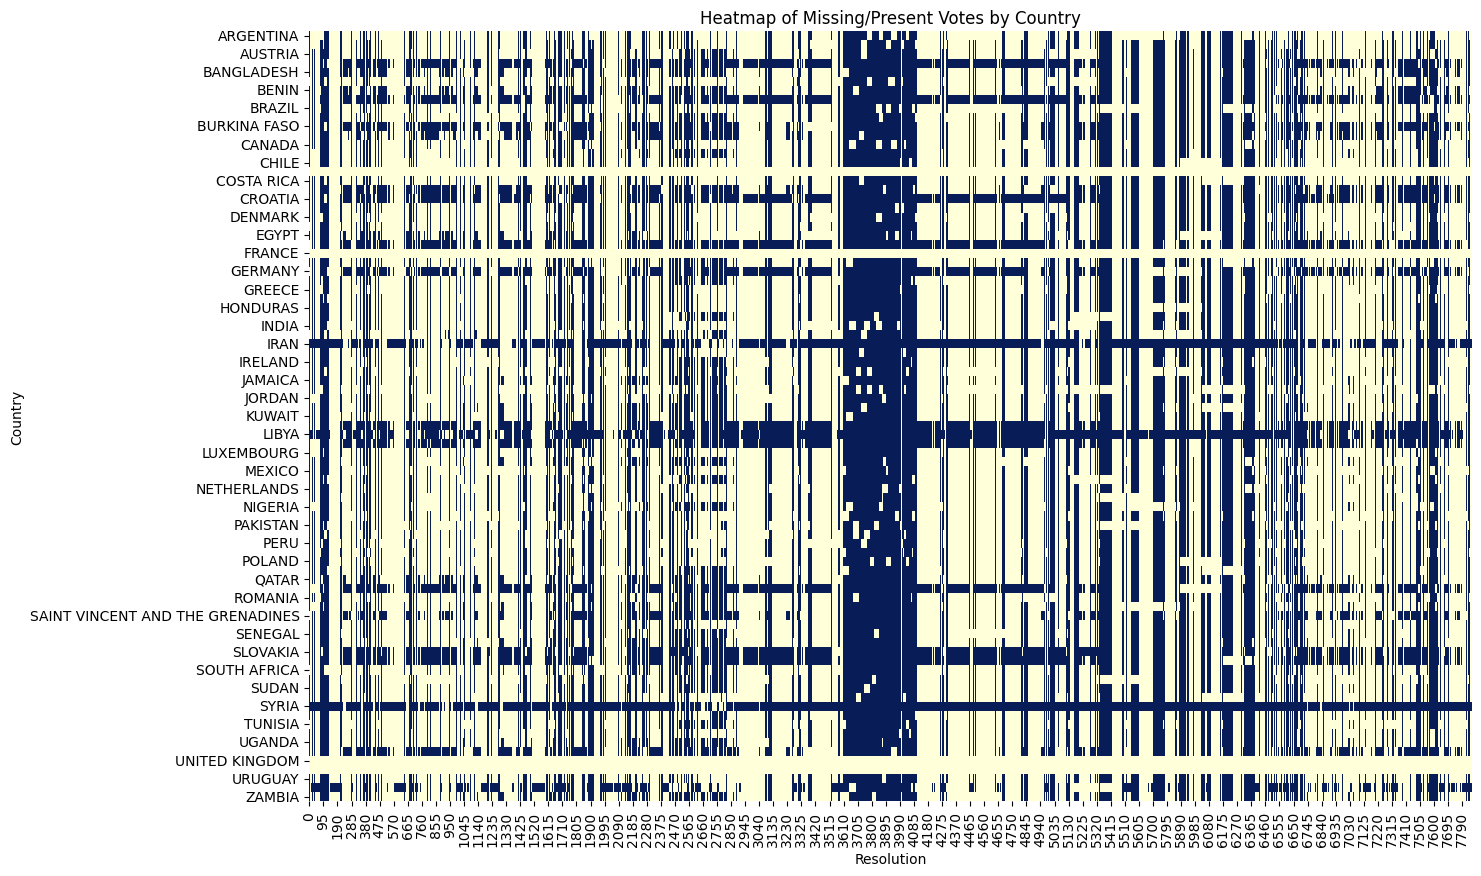

In [18]:
# Compute a pivot table for visualization
voting_heatmap = processed_unsc_df.iloc[:, 2:].transpose()

plt.figure(figsize=(15, 10))
sns.heatmap(voting_heatmap.isna(), cmap="YlGnBu", cbar=False)
plt.title("Heatmap of Missing/Present Votes by Country")
plt.ylabel("Country")
plt.xlabel("Resolution")
plt.show()

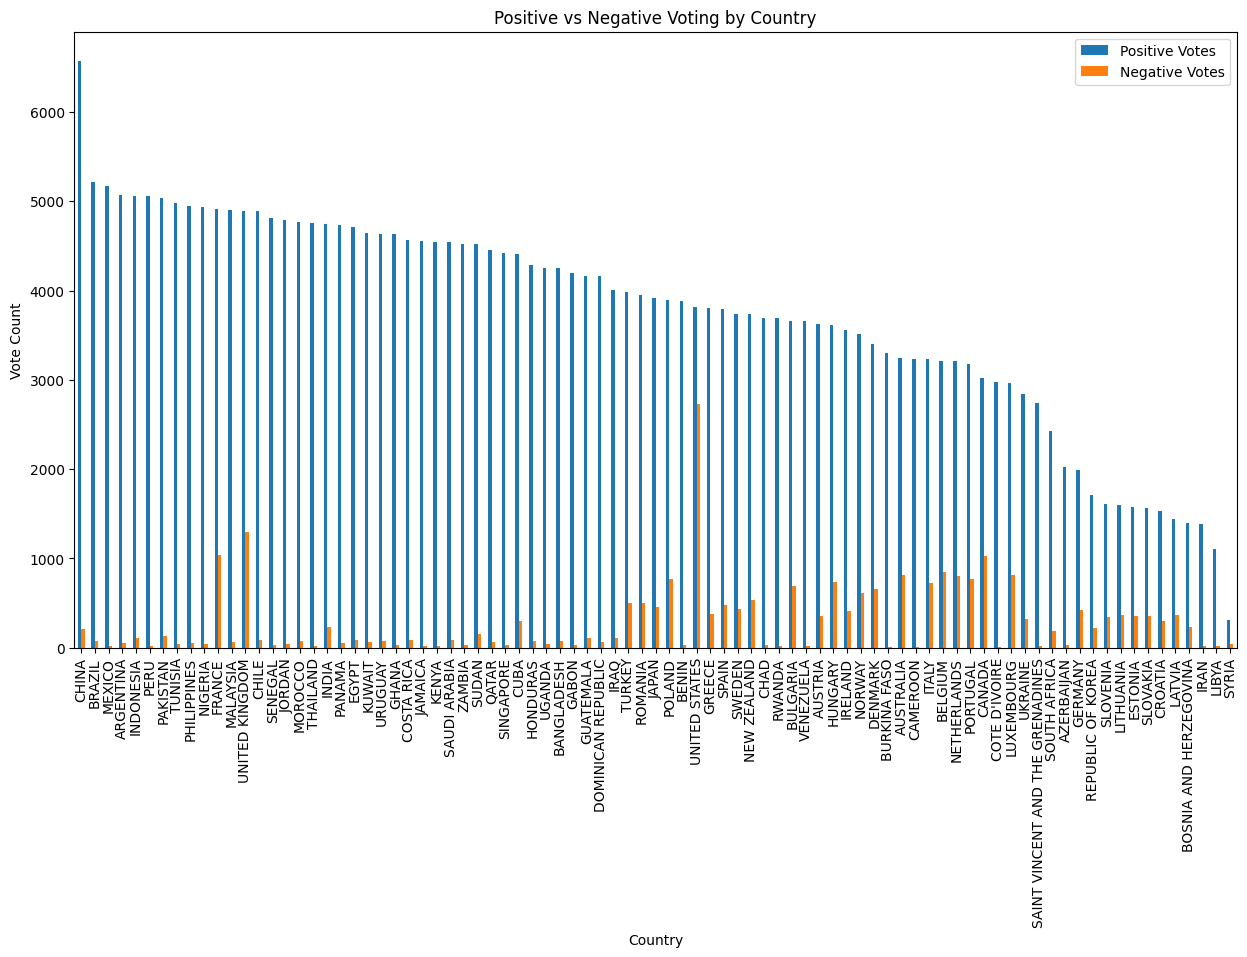

In [19]:
# Calculate positive and negative votes for each country
positive_votes = (processed_unsc_df.iloc[:, 2:] == 1).sum()
negative_votes = (processed_unsc_df.iloc[:, 2:] == -1).sum()

# Create a DataFrame for visualization
vote_comparison = pd.DataFrame({
    'Country': positive_votes.index,
    'Positive Votes': positive_votes.values,
    'Negative Votes': negative_votes.values
}).sort_values(by='Positive Votes', ascending=False)

# Plot positive vs negative votes
vote_comparison.set_index('Country').plot(kind='bar', figsize=(15, 8))
plt.title("Positive vs Negative Voting by Country")
plt.xlabel("Country")
plt.ylabel("Vote Count")
plt.show()

## RAG With Llama

### Installing requirements

In [20]:
!pip install langchain langchain-groq faiss-cpu pandas python-dotenv sentence-transformers -q
!pip install langchain_community

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.3 requires cubinlinker, which is not installed.
cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.3 requires ptxcompiler, which is not installed.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.3 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.6.0 which is incompatible.
distributed 2024.7.1 requires dask==2024.7.1, but you have dask 2024.9.1 which is incompatible.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 24.2 which is incompatible.
jupyterlab 4.2.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which 

In [21]:
from typing import List, Dict
import pandas as pd
import os
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_groq import ChatGroq
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.schema import Document

# Set your API key
os.environ["GROQ_API_KEY"] = "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"

## Initialising Components

In [22]:
# Text splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=100,
    length_function=len
)

# Embeddings
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-mpnet-base-v2"
)

# Groq LLM
llm = ChatGroq(
    model_name="llama-3.2-3b-preview",
    temperature=0,
    streaming=True,
    max_tokens=4096
)

# Step 2: Define function to decode voting data
def decode_voting(row: pd.Series) -> str:
    """Decode voting data into a human-readable format."""
    vote_mapping = {'Y': 'Yes', 'N': 'No', 'X': 'Abstain', 'A': 'Absent', None: 'Not part of SC'}
    decoded_votes = []

    for col, value in row.items():
        if col not in ['COUNCIL', 'DATE', 'RESOLUTION']:
            decoded_value = vote_mapping.get(value, value)
            decoded_votes.append(f"{col}: {decoded_value}")
    
    return ", ".join(decoded_votes)

/tmp/ipykernel_23/3067572159.py:9: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Loading and preprocessing data

In [ ]:
# Load datasets
resolutions_df = pd.read_csv('./Full_UN_Resolutions_Formatted.csv')
socio_econ_df = pd.read_csv('./Filtered_SocioEconomic_Countries.csv')
voting_df = pd.read_csv('./Encoded_UNSC_Voting_Data.csv')

# Prepare documents
documents = []

# Process resolutions
for _, row in resolutions_df.iterrows():
    doc = Document(
        page_content=row["FullText"],
        metadata={"type": "Resolution", "ResolutionNumber": row["ResolutionNumber"]}
    )
    split_docs = text_splitter.split_documents([doc])  # Split all documents
    documents.extend(split_docs)

# Process socio-economic data
for _, row in socio_econ_df.iterrows():
    content = f"Socio-economic data for {row['country']} includes: " + \
             ", ".join([f"{col}: {row[col]}" for col in socio_econ_df.columns[1:]])
    doc = Document(
        page_content=content,
        metadata={"type": "Socio-Economic Data", "Country": row["country"]}
    )
    split_docs = text_splitter.split_documents([doc])  # Split all documents
    documents.extend(split_docs)

# Process voting data
for _, row in voting_df.iterrows():
    decoded_votes = decode_voting(row)
    content = f"Voting data for Resolution {row['Resolution']} on {row['Date']} includes: {decoded_votes}"
    doc = Document(
        page_content=content,
        metadata={"type": "Voting Data", "ResolutionNumber": row['Resolution']}
    )
    split_docs = text_splitter.split_documents([doc])  # Split all documents
    documents.extend(split_docs)

print(f"Processed {len(documents)} documents")

Processed 69253 documents


## Creating FAISS vector store

In [24]:
print("Creating FAISS vector store...")
vectorstore = FAISS.from_documents(documents, embeddings)

Creating FAISS vector store...


## Setting up the RAG Chain

In [25]:
print("Setting up RAG chain...")

# Define prompt template
prompt_template = """You are an expert analyst of UN resolutions and voting patterns. Based on the provided context, please give a detailed analysis of the question.

Context: {context}

Question: {question}

Provide a thorough analysis."""
PROMPT = PromptTemplate(
    template=prompt_template,
    input_variables=["context", "question"]
)

# Create retrieval QA chain
chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=vectorstore.as_retriever(
        search_kwargs={"k": 15}  # Retrieve 15 chunks
    ),
    chain_type_kwargs={
        "prompt": PROMPT,
        "verbose": True
    }
)

Setting up RAG chain...


### Sample queries

In [26]:
print("Querying the chain...")
question = "Go through some resolutions that mention Somalia and summarize what the UN thinks about it?"
answer = chain.invoke({"query": question})["result"]

print(f"\nAnswer: {answer}")

Querying the chain...


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are an expert analyst of UN resolutions and voting patterns. Based on the provided context, please give a detailed analysis of the question.

Context: Committee”) to Somalia and States in the region in June 2002 and looking forward
to his report in this regard,
Acting under Chapter VII of the Charter of the United Nations,
1.
Requests the Secretary-General to establish, within one month from the
date of adoption of this resolution, in preparation for a Panel of Experts, a team of
experts consisting of two members for a period of 30 days, to provide the
Committee with an action plan detailing the resources and expertise that the Panel of

21. Looks forward to the Secretary-General’s inter-agency review of the 
United Nations presence in Somalia, emphasizes the need to develop an integrated 
strategic approach to all activities of the United Nations system i

In [27]:
print("Querying the chain...")
question = "Analyse India s stance on sanctions?"
answer = chain.invoke({"query": question})["result"]

print(f"\nAnswer: {answer}")

Querying the chain...


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are an expert analyst of UN resolutions and voting patterns. Based on the provided context, please give a detailed analysis of the question.

Context: United Nations 
 
S/RES/1732 (2006)
 
 
 
Security Council 
 
Distr.: General 
21 December 2006 
 
 
 
06-67780 (E)     
*0667780* 
 
 Resolution 1732 (2006) 
 
 
 
 Adopted by the Security Council at its 5605th meeting, on 
21 December 2006 
 
 
 
The Security Council, 
 
Welcomes the report of the Informal Working Group on General Issues of 
Sanctions, established pursuant to paragraph 3 of the note by the President of the 
Security Council dated 17 April 2000 (S/2000/319).

2. 
Recalls the Informal Working Group on General Issues of Sanctions 
report (S/2006/997) on best practices and methods, including paragraphs 21, 22, and 
23 that discuss possible steps for clarifying methodological standards for moni

In [28]:
print("Querying the chain...")
question = "Assess the diplomatic considerations that guide Russia's decisions regarding sanctions on states with which it has historical or economic ties?"
answer = chain.invoke({"query": question})["result"]

print(f"\nAnswer: {answer}")

Querying the chain...


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are an expert analyst of UN resolutions and voting patterns. Based on the provided context, please give a detailed analysis of the question.

Context: Sanctions Committee/Panel of Experts  
 
 
11. 
Emphasizes the importance of holding regular consultations with 
concerned Member States, international and regional and subregional organizations, 
as well as UNMISS, as may be necessary, in particular neighbouring and regional 
States, in order to ensure the full implementation of the measures in this resolution, 
and in that regard encourages the Committee to consider, where and when

2339 (2017) and this resolution, including the obligation to implement targeted 
sanctions against individuals and entities designated by the Sanctions Committee 
established pursuant to resolution 2127 (2013) (the Committee),  
 
Noting the critical importance of effective imp

In [29]:
print("Querying the chain...")
question = "Analyze Germany's economic policies and their impact on the European Union's economic stability and growth."
answer = chain.invoke({"query": question})["result"]

print(f"\nAnswer: {answer}")

Querying the chain...


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are an expert analyst of UN resolutions and voting patterns. Based on the provided context, please give a detailed analysis of the question.

Context: Socio-economic data for Germany includes: country: Germany, Region: WesternEurope, Surface area (km2): 357376, Population in thousands (2017): 82114, Population density (per km2, 2017): 235.6, Sex ratio (m per 100 f, 2017): 97.0, GDP: Gross domestic product (million current US$): 3363600, GDP growth rate (annual %, const. 2005 prices): 1.7, GDP per capita (current US$): 41686.2, Economy: Agriculture (% of GVA): 0.6, Economy: Industry (% of GVA): 30.5, Economy: Services and other activity (% of

Socio-economic data for Austria includes: country: Austria, Region: WesternEurope, Surface area (km2): 83871, Population in thousands (2017): 8736, Population density (per km2, 2017): 106.0, Sex ratio (m per 100 f, 20

In [30]:
print("Querying the chain...")
question = "Examine the USA's approach to military interventions and its impact on global security dynamics ?"
answer = chain.invoke({"query": question})["result"]

print(f"\nAnswer: {answer}")

Querying the chain...


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are an expert analyst of UN resolutions and voting patterns. Based on the provided context, please give a detailed analysis of the question.

Context: international relations, from the threat or the use of force in any manner inconsistent
with the Purposes of the United Nations, and of peaceful settlement of international
disputes,
Reaffirming the need to adopt a broad strategy of conflict prevention, which
addresses the root causes of armed conflict and political and social crises in a
comprehensive manner, including by promoting sustainable development, poverty

dimensions of armed conflicts with specific emphasis on regional diplomacy and 
arrangements,  
 
Reiterating its commitment to pursue all possible avenues to prevent and end 
armed conflicts, including through addressing their underlying root causes in an 
inclusive, integrated and sustainable m

In [31]:
print("Querying the chain...")
question = "Analyze Russia's military strategy and its implications for regional security in Eastern Europe and beyond."
answer = chain.invoke({"query": question})["result"]

print(f"\nAnswer: {answer}")

Querying the chain...


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are an expert analyst of UN resolutions and voting patterns. Based on the provided context, please give a detailed analysis of the question.

Context: 1. 
Recalls the arrangements entered into under the agreements of 12 August 
2008 and of 8 September 2008;  
 
2. 
Calls for the provisions that were set out in paragraph 2 (a) of the 
Agreement on a Ceasefire and Separation of Forces signed in Moscow on 14 May 
1994 (S/1994/583) to be respected, pending consultations and agreement on a 
revised security regime, taking note of the recommendations on the security regime 
contained in the report of the Secretary-General of 4 February 2009;

enforcement and education;
10.
Condemns all violations of the Moscow Agreement of 14 May 1994 on a
Ceasefire and Separation of Forces (S/1994/583, annex I), and notes with particular
concern the Abkhaz military exercise con